In [ ]:
#activate the commnad bellow if you do not have tensorflow downloaded
#!pip install tensorflowt

: 

In [2]:
from numpy import argmax
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import Input
import numpy as np
from PIL import Image

In [3]:
#loading the mnist dataset
(x_train, y_train), (x_test, y_test) = load_data()
#reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

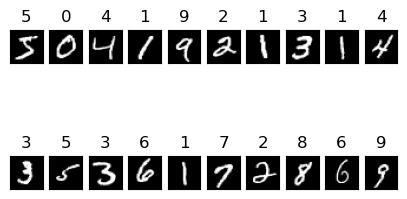

In [9]:
#display 15 images in grayscale 
fig = plt.figure(figsize = (5,3))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks = [] , yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
    ax.set_title(y_train[i])

In [10]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [6]:
inp_shape = (28, 28, 1)
#defining the model wich is a secuential model
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])
x = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.9269 - loss: 0.2373 - val_accuracy: 0.9848 - val_loss: 0.0553
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 3/10
422/422 - 4s - 9ms/step - accuracy: 0.9806 - loss: 0.0623 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 4/10
422/422 - 4s - 9ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9917 - val_loss: 0.0285
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9867 - loss: 0.0412 - val_accuracy: 0.9922 - val_loss: 0.0278
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.9922 - val_loss: 0.0255
Epoch 7/10
422/422 - 4s - 9ms/step - accuracy: 0.9892 - loss: 0.0334 - val_accuracy: 0.9915 - val_loss: 0.0294
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9896 - loss: 0.0310 - val_accuracy: 0.9933 - val_loss: 0.0254
Epoch 9/10
422/422 - 4s - 9ms/step - accuracy: 0.9918 - loss: 0.0263 - val_accuracy: 0.9940 - val_loss: 0.0247


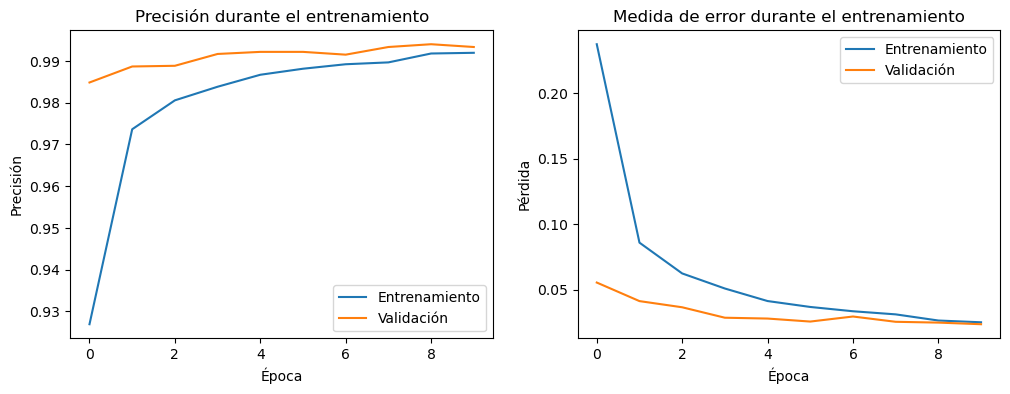

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x.history['accuracy'], label='Entrenamiento')
plt.plot(x.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x.history['loss'], label='Entrenamiento')
plt.plot(x.history['val_loss'], label='Validación')
plt.title('Medida de error durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy: {accuracy * 100}')

Accuracy: 99.21000003814697


In [15]:
valor = int(input('Digite un valor de 0 a 9999 para escoger una imagen de la base de datos de MNIST: '))

if valor < 0 or valor > 9999:
    raise ValueError("El valor debe estar entre 0 y 9999.")

Digite un valor de 0 a 9999 para escoger una imagen de la base de datos de MNIST 1000


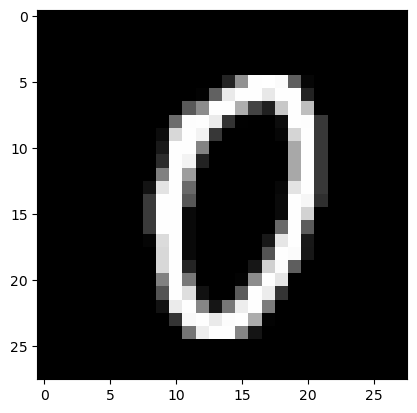

In [16]:
image = x_train[valor]

plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [18]:
image = image.reshape(1, 28, 28, 1)
p = model.predict(image)
print('Predicción ejemplo:', argmax(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción ejemplo: 0
